# Guided Project : Visualizing college majors population, popularity and median earning

## Introduction

In this guided project, we'll explore how using the Pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations.

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012.

Using visualizations, we will try to answer the following questions:
- Do students in more popular majors make more money?
- How many majors are predominantly male? Predominantly female?
- Which category of majors have the most students?

### Summary

Exploring the dataset using visualisation tools, we managed to answer the questions above by making the following observations:

- No correlation was found between a major's popularity and its associated median earning. In fact, the major with the highest median earning is among the least popular ones (with the fewer students enrolled).

- Among the 172 majors listed in the dataset, 96 of them are predominantly female while 76 are predominantly male.

- The _Business_ major category is by far the most popular, followed by _Humanities & Liberal Arts_.

## The Data

The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. [FiveThirtyEight](https://fivethirtyeight.com) cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries and more. Here are some of the columns in the dataset:
- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.

## Librairies import and dataset reading

In [43]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv("recent-grads.csv")

## Dataset overview

In [44]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

The dataset contains 173 entries and 21 columns.
These 21 columns are a mix of integer, float and string types.

Four columns have missing values. These columns, `Total`, `Men`, `Women` and `ShareWomen` only have one missing value each.

Let's check the head and tail of the dataframe to get familiar with the dataset.

In [45]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [46]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


Let's now generate summary statistics for all the numeric columns.

In [47]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Data Cleaning

We decide to get rid of the rows featuring missing values.

In [48]:
raw_data_count = len(recent_grads)
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads)
print("Number of rows before cleaning :",raw_data_count)
print("Number of rows after cleaning :",cleaned_data_count)

Number of rows before cleaning : 173
Number of rows after cleaning : 172


We can see that only one row contained missing values.

## Exploratory Data Analysis

### Relation between a major's popularity and its associated median earning

We start by exploring the relation between `Total` and `Median` to see if students issued from the most popular majors make more money in their future jobs.

(0, 500000)

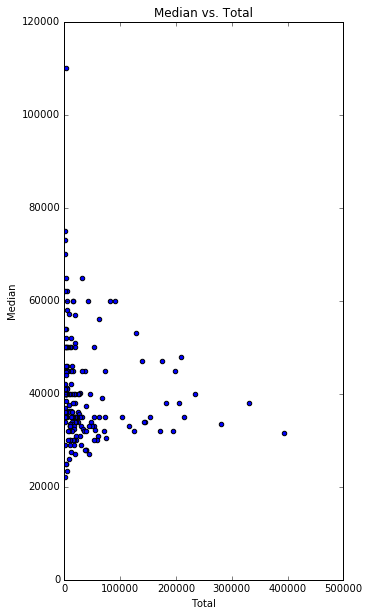

In [49]:
ax = recent_grads.plot(x="Total",y="Median",kind="scatter",title="Median vs. Total",figsize=(5,10))
ax.set_xlim(0,500000)

There doesn't seem to be a particular correlation here between the popularity of a major and the money its students make in their futur jobs.
In fact, the major with the most students has an associated median earning value among the lowests. On the opposite, the biggest span of median earnings is for majors with the lowest numbers of students.

The highest median earning value is around 110,000$. Let's check which major this median value corresponds to.

In [50]:
max_median = recent_grads["Median"].max()
recent_grads[recent_grads["Median"] == max_median]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


The major with the highest median earning is the _Petroleum Engineering_ major. This is not startling as this field is well-known for its high salaries.

Among the students who graduated between 2010-2012 and who answered this survey, 2339 of them took this major.

Let's get some statistics on the `Total` column to see how this compares to the rest of the majors.

In [51]:
recent_grads["Total"].describe()

count       172.000000
mean      39370.081395
std       63483.491009
min         124.000000
25%        4549.750000
50%       15104.000000
75%       38909.750000
max      393735.000000
Name: Total, dtype: float64

The 1st quartile is at 4550 and the number of students averaged over all majors is of 39370. This confirms that the _Petroleum Engineering_ major is in the majors that have the least students.

### Men and women share in majors

In this section, we want to find out how many majors are predominantly male/female.

We start by checking the number of unique majors present in the dataset and the number of categories they are grouped into.

In [52]:
recent_grads["Major"].unique().shape

(172,)

In [53]:
recent_grads["Major_category"].unique().shape

(16,)

The dataset lists 172 unique majors grouped into 16 different majors categories.

We first decide to check the share of women per majors categories to see which one is predominantly female.
To do that, we fist need to get the average share of women per category. We aggregate by the `Major_category` column and compute the average of `ShareWomen` for each category of majors.

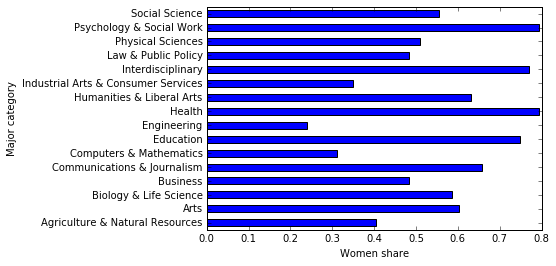

In [54]:
avg_ShareWomen = recent_grads.groupby("Major_category", as_index=False).agg({"ShareWomen": "mean"})

ax = avg_ShareWomen.plot.barh(x="Major_category",y="ShareWomen",color="blue",legend=False)
ax.set_xlabel("Women share")
ax.set_ylabel("Major category")

From observing the bar plot above, we can conclude that 10 major categories out of 16 have a share of women superior to 50%.

We can now check the distribution of women share across majors.

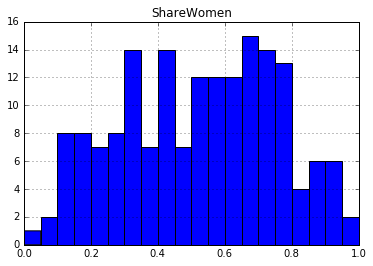

In [55]:
ax = recent_grads.hist("ShareWomen",range=(0,1),bins=20)

In [56]:
len(recent_grads[recent_grads["ShareWomen"]>0.5])

96

Among the 172 majors listed in the dataset, 96 of them (~56%) are predominantly female and 76 predominantly male.

### Popularity of major's category

Finally, we want to know which category of majors is the most popular.

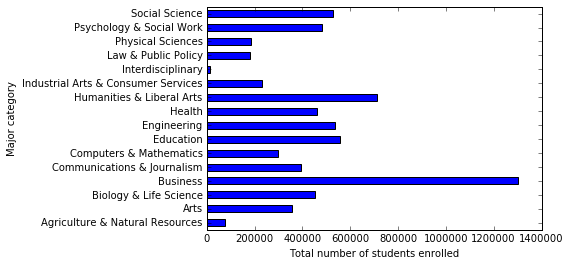

In [57]:
total_students_cat = recent_grads.groupby("Major_category", as_index=False).agg({"Total": "sum"})

ax = total_students_cat.plot.barh(x="Major_category",y="Total",color="blue",legend=False)
ax.set_xlabel("Total number of students enrolled")
ax.set_ylabel("Major category")

From observing this bar plot, we can conclude that the _Business_ major category is by far the most popular, followed by _Humanities & Liberal Arts_.

## Conclusion

In this project, we used visualition tools to help us get insights on the dataset and answer the following questions:

-  Do students in more popular majors make more money?

No correlation was found between a major's popularity and its associated median earning. In fact, the major with the highest median earning is among the least popular ones (with the fewer students enrolled).

- How many majors are predominantly male? Predominantly female?

Among the 172 majors listed in the dataset, 96 of them are predominantly female while 76 are predominantly male.

- Which category of majors have the most students?

The _Business_ major category is by far the most popular, followed by _Humanities & Liberal Arts_.